In [ ]:
#Download the dataset from this link: https://drive.google.com/uc?id=1dVK2MgtXvrSOVBVodKhlAf0XMIa-2jGF
#Add this data to your Google Drive and know the exact location of where you have kept it.

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


"\nfrom google.colab import drive\n\n# Mount Google Drive\ndrive.mount('/content/drive')\n"

In [ ]:
# Use Pandas to read the csv data
import pandas as pd

In [ ]:
# Storing the CSV data in pandas DataFrame
path_to_csv = '/content/drive/MyDrive/Program Datasets/SDSS Tabular Data.csv' # I had stored my csv data within MyDrive > Program Datasets > SDSS Tabular Data.csv
df = pd.read_csv(path_to_csv)

In [ ]:
# Display first 5 rows of data from the df
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
# Check the unique elements in class column
unique = df['class'].unique()
print(f'There are {len(unique)} unique classes in our data:- {unique}')

There are 3 unique classes in our data:- ['STAR' 'GALAXY' 'QSO']


In [ ]:
# After checking the columns with constant values, we saw objid and rerun column had only one value in all 10000 rows
print('-'*60)
print('Rerun Column has "301" value repeated for 10,000 times:-')
print('-'*60)
print(df['rerun'].value_counts())

print()

print('-'*70)
print('Objid column has the same thing, a value repeated for 10,000 times:-')
print('-'*70)
print(df['objid'].value_counts())

------------------------------------------------------------
Rerun Column has "301" value repeated for 10,000 times:-
------------------------------------------------------------
301    10000
Name: rerun, dtype: int64

----------------------------------------------------------------------
Objid column has the same thing, a value repeated for 10,000 times:-
----------------------------------------------------------------------
1.237650e+18    10000
Name: objid, dtype: int64


In [ ]:
# Check the basic info about this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


**Observations:-**
- There are total of 10,000 rows and 18 Columns
- There are no missing data as in all the columns, non-null values are 10,000
- The decimal values are stored as float64 type
- The integer values are sotred as int64 type
- The non-numeric data, `class` column is stored as object type
- Total memory usage of the DataFrame is about 1.4 MB

In [ ]:
# Using matplotlib's pyplot to create this visualization
import matplotlib.pyplot as plt

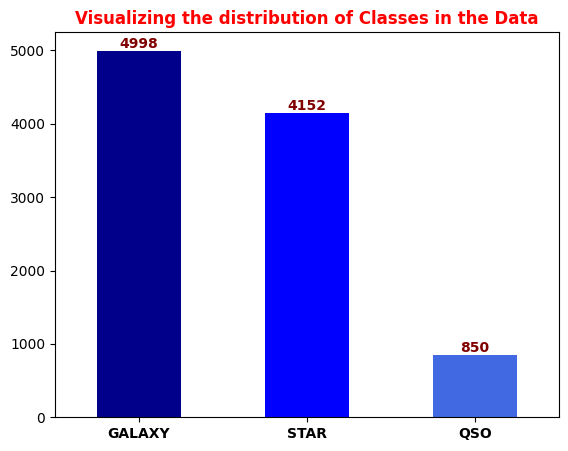

In [ ]:
# Check the count of galaxy, star and qasar in our data

# Adjusting the Figure Size
plt.figure(figsize=(6.5,5))

''' We can plot directly using pandas '''
# value_counts() gives counts of unique values in the column it is used on
ax = df['class'].value_counts().plot(kind='bar', color=['darkblue', 'blue', 'royalblue'])

# Using ax (axis) to display the bar_label using containers[0] as thats where the location is of the counts
ax.bar_label(ax.containers[0], color='maroon', weight='bold')

# Customizing the Plot a bit more
plt.xticks(weight='bold', rotation=0)
plt.title('Visualizing the distribution of Classes in the Data', color='r', weight='bold', fontsize=12)

# Save the Figure and Display the output
plt.savefig('ClassDistribution.png') # You can download the visualization from files section (left panel)
plt.show()

**Observations:-**
- We can clearly see that the Quasars (QSO: Quasi-Stellar Objects) are the least in amount as comared to Galaxies and Stars.
- Galaxy to Star Ratio is about 1:1
- Galaxy to Quasar Ratio is about 6:1

In [ ]:
# Preparing 3 different DataFrames to plot the object distribution from the SDSS Data
star_df = df[df['class']=='STAR']        # Will be used to plot star data
qso_df = df[df['class']=='QSO']          # Will be used to plot quasar data
galaxy_df = df[df['class']=='GALAXY']    # Will be used to plot galaxy data

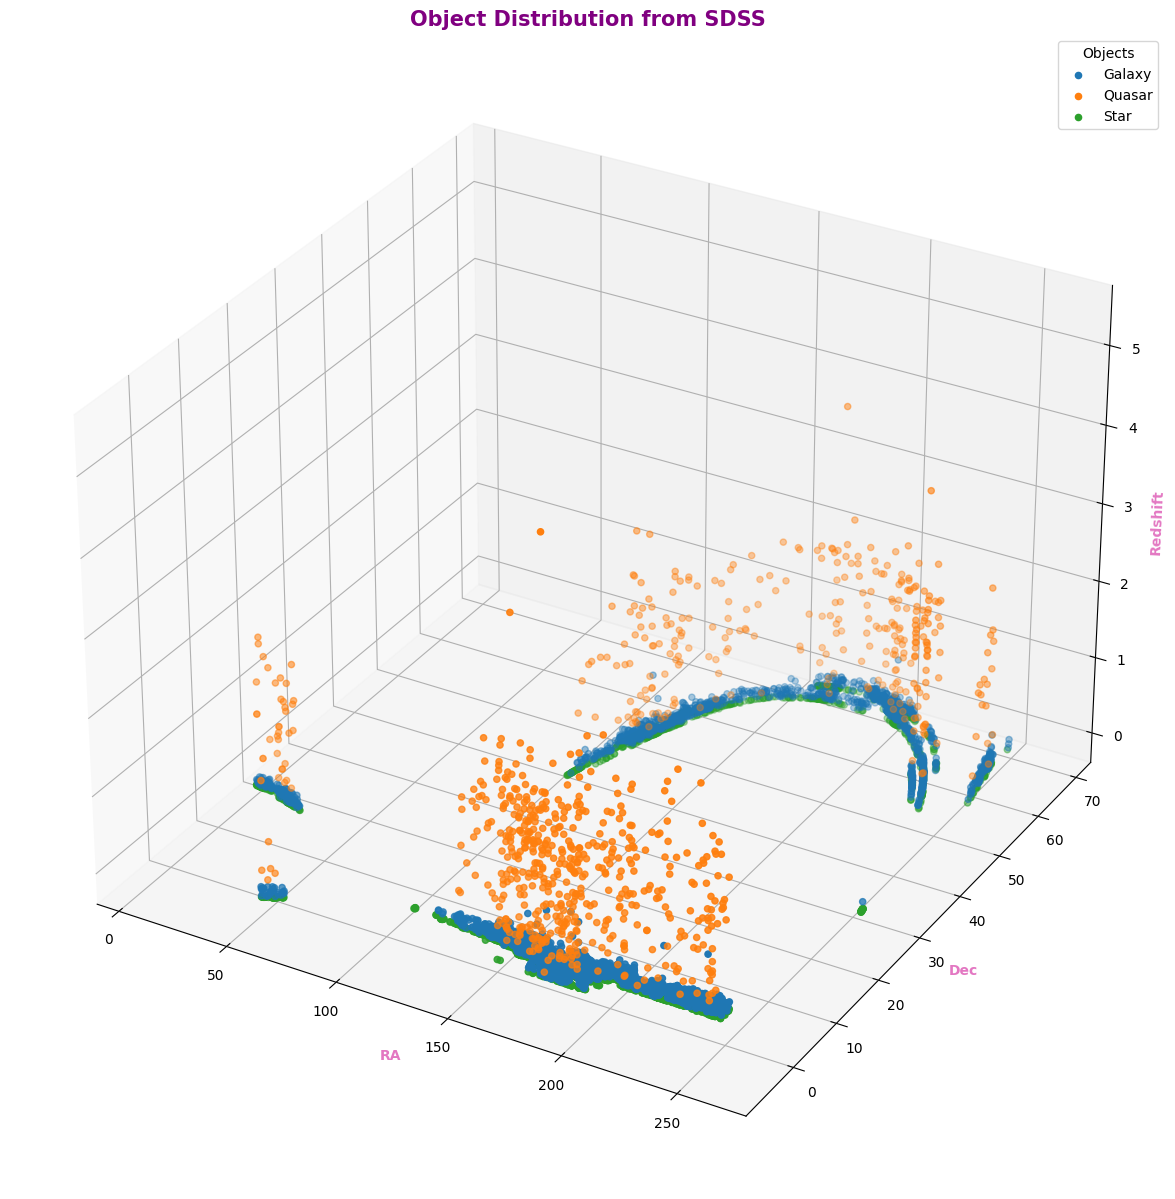

In [ ]:
# Visualize the stars, galaxies and quasars data from the DataFrame

# Adjusting Figure Size and Creating a 3D Axis
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Adding 3 Scatter Plots with respect to Right Ascension, Declination and Redshift
ax.scatter(galaxy_df['ra'], galaxy_df['dec'], galaxy_df['redshift'], label='Galaxy')
ax.scatter(qso_df['ra'], qso_df['dec'], qso_df['redshift'], label='Quasar')
ax.scatter(star_df['ra'], star_df['dec'], star_df['redshift'], label='Star')

# Adding Labels for the axes
ax.set_xlabel('RA', color = 'tab:pink', weight='bold')
ax.set_ylabel('Dec', color = 'tab:pink', weight='bold')
ax.set_zlabel('Redshift', color = 'tab:pink', weight='bold')

# Add title and legend to the plot
ax.set_title('Object Distribution from SDSS', color='purple', weight='bold', fontsize=15)
plt.legend(title='Objects', fontsize=10,)

# Save Figure and Display it
plt.savefig('Object Distribution from SDSS')
plt.show()

**Observations:-**
* Stars and Galaxy Data seems to have very similar redshift data throughout the distribution.
* Hence, it is hypothesized that our model may have a tough time to classify stars and galaxies!
* We shall prove our Hypothesis by the end of this notebook.

In [ ]:
# Preparing X and y data and splitting it into train and test
X = df.drop(['objid', 'rerun', 'class'], axis=1).values # Independet Features
y = df['class'].values                                  # Dependent Feature

In [ ]:
# Check X data
print(X)
print()
print(X.shape)

[[1.83531326e+02 8.96930300e-02 1.94740600e+01 ... 3.30600000e+03
  5.49220000e+04 4.91000000e+02]
 [1.83598370e+02 1.35285032e-01 1.86628000e+01 ... 3.23000000e+02
  5.16150000e+04 5.41000000e+02]
 [1.83680207e+02 1.26185092e-01 1.93829800e+01 ... 2.87000000e+02
  5.20230000e+04 5.13000000e+02]
 ...
 [1.31552562e+02 5.16669864e+01 1.87581800e+01 ... 7.30300000e+03
  5.70130000e+04 6.22000000e+02]
 [1.31477151e+02 5.17530678e+01 1.88828700e+01 ... 4.47000000e+02
  5.18770000e+04 2.29000000e+02]
 [1.31665012e+02 5.18053075e+01 1.92758600e+01 ... 4.47000000e+02
  5.18770000e+04 2.33000000e+02]]

(10000, 15)


In [ ]:
# Check y data
print(y)
print()
print(y.shape)

['STAR' 'STAR' 'GALAXY' ... 'STAR' 'GALAXY' 'GALAXY']

(10000,)


In [ ]:
# Reshaping y into its colum vector format
y = y.reshape(10000, 1)

In [ ]:
print(y)
print()
print(y.shape)

[['STAR']
 ['STAR']
 ['GALAXY']
 ...
 ['STAR']
 ['GALAXY']
 ['GALAXY']]

(10000, 1)


In [ ]:
# Spliting the original data into training and testing (to evaluate the model performance later on)
from sklearn.model_selection import train_test_split

# Split 25% of the data randomly as test and keep 75% as train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Check the shape --> Train must have 7500 rows and 15 cols, Test must have 2500 rows and 15 cols
print(f'X train shape:- {X_train.shape}\nX test shape:-{X_test.shape}')

X train shape:- (7500, 15)
X test shape:-(2500, 15)


In [ ]:
#As we know y data is a string type data that our machines do not understand, so we need to convert it into numeric format.
#Hence, we use one hot encoder for the same purpose here from sklearn

# Call OneHotEncoder Class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Create the object of one hot encoder of OneHotEncoder Class
enc = OneHotEncoder()

In [ ]:
# Use fit_transform only on train data to take category and convert it into one hot encoded vector
y_train = enc.fit_transform(y_train).toarray() # Converting it to numpy array

In [ ]:
# Check the categories stored after using fit on train data
print(enc.categories_)

[array(['GALAXY', 'QSO', 'STAR'], dtype=object)]


In [ ]:
# Demonstrating One Hot Encoder
print(y_train[0])

[0. 0. 1.]


In [ ]:
# You can apply inverse transform to check if this is a 'STAR' type or not
enc.inverse_transform(y_train[0].reshape(1, 3)) # inverse_transform will need 3 columns and rows to convert it back to original class

array([['STAR']], dtype=object)

In [ ]:
# Try for another index in y_train
print(y_train[10])

[1. 0. 0.]


In [ ]:
# Index 10 must have a galaxy
enc.inverse_transform(y_train[10].reshape(1, 3))

array([['GALAXY']], dtype=object)

In [ ]:
# Use only transform as enc object now know which one hot encoded vector is for GALAXY, STAR and QSO
y_test = enc.transform(y_test).toarray()       # Converting it to numpy array

In [ ]:
# Check if it works well on y_test before moving forward
y_test[12]

array([0., 1., 0.])

In [ ]:
# Should be a QSO
enc.inverse_transform(y_test[12].reshape(1, 3))

array([['QSO']], dtype=object)

In [ ]:
# Importing Scaler from sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating the object of scaler
sc = MinMaxScaler(feature_range=(0,1)) # min scaled value = 0, max scaled value = 1

# fit will calculate min and max for each of the 15 features and transform will apply the formula explained above to transform it
X_train = sc.fit_transform(X_train)

In [ ]:
# Check the data stored in sc after using fit on train data
print('Minimum values in all the features:-')
print(sc.data_min_)

print()

print('Similarly, Maximum values in all the features:-')
print(sc.data_max_)

print()

print('Check the total features used in scaler:-')
print(sc.n_features_in_)

Minimum values in all the features:-
[ 8.2351005e+00 -5.3826325e+00  1.4728250e+01  1.3205550e+01
  1.2444270e+01  1.2065440e+01  1.1757420e+01  3.0800000e+02
  1.0000000e+00  1.1000000e+01  2.9957800e+17 -4.1360780e-03
  2.6600000e+02  5.1578000e+04  1.0000000e+00]

Similarly, Maximum values in all the features:-
[2.60811189e+02 6.85422654e+01 1.95999000e+01 1.99189700e+01
 2.48020400e+01 2.43618100e+01 2.28269100e+01 1.41200000e+03
 6.00000000e+00 7.68000000e+02 9.46883000e+18 5.35385400e+00
 8.41000000e+03 5.74810000e+04 9.98000000e+02]

Check the total features used in scaler:-
15


In [ ]:
# Check if min and max value after scaling train data is in between 0 to 1 or not
print('Train Range after Min Max Scaling:-')
print(X_train.min(), X_train.max())

Train Range after Min Max Scaling:-
0.0 1.0000000000000002


In [ ]:
# Now just apply transform on the X_test
X_test = sc.transform(X_test)

In [ ]:
# Now depending on the test data, the scaling might have value below 0 and above 1 as well. Let's check it
print('Test Range after Min Max Scaling:-')
print(X_test.min(), X_test.max())

Test Range after Min Max Scaling:-
-0.3570207219319941 1.3104835004151631


In [ ]:
# Importing Model, Layer and Tensorflow
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
# Fix the seed value for the randomization of the model parameters
tf.random.set_seed(42)

# Create the Model with Sequential Class
model = Sequential()

# Add different layers to the model
model.add(Dense(64,input_dim=15, activation='relu')) # Input Layer --> 15 Neurons, 1st Hidden Layer --> 64
model.add(Dense(32, activation='relu'))              # Hidden Layer 2 --> 32 Neurons
model.add(Dense(16, activation='relu'))              # Hidden Layer 3 --> 16 Neurons
model.add(Dense(3, activation='softmax'))            # Output Layer --> 3 Neurons (star, galaxy, quasar)

# Print the Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3683 (14.39 KB)
Trainable params: 3683 (14.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), # As Learning Rate is the hyperparameter, we can change it to see impact on training
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train,                   # Pass X_train data
                    y_train,                   # Pass y_train data
                    validation_split=0.1,      # Give 10% Validation split
                    epochs=40,                 # Hyperparameter that can be tuned to achieve maximum performance
                    batch_size=32)             # Set batch size

Epoch 1/40
211/211 [==============================] - 7s 15ms/step - loss: 0.7059 - accuracy: 0.7656 - val_loss: 0.5219 - val_accuracy: 0.8053
Epoch 2/40
211/211 [==============================] - 2s 9ms/step - loss: 0.4162 - accuracy: 0.8542 - val_loss: 0.3502 - val_accuracy: 0.8747
Epoch 3/40
211/211 [==============================] - 1s 7ms/step - loss: 0.3191 - accuracy: 0.8899 - val_loss: 0.3033 - val_accuracy: 0.9013
Epoch 4/40
211/211 [==============================] - 2s 7ms/step - loss: 0.2756 - accuracy: 0.9016 - val_loss: 0.2702 - val_accuracy: 0.9013
Epoch 5/40
211/211 [==============================] - 1s 5ms/step - loss: 0.2553 - accuracy: 0.9099 - val_loss: 0.2566 - val_accuracy: 0.9080
Epoch 6/40
211/211 [==============================] - 1s 6ms/step - loss: 0.2343 - accuracy: 0.9142 - val_loss: 0.2302 - val_accuracy: 0.9107
Epoch 7/40
211/211 [==============================] - 1s 6ms/step - loss: 0.2075 - accuracy: 0.9280 - val_loss: 0.2238 - val_accuracy: 0.9173
Epoch

**Observations:-**
* Clearly, we can see that model is not overfitting as training and validation accuracy are very close to each other!
* We shall also visualize this for better understanding.
* Just to know that our model is able to get about `98%` accuracy is not really giving us idea about how each category is being predicted.
* Hence, we shall use some other techniques too at the end of the notebook.

**Note:-**
* There might be some difference in the training due to the precision of the machine being used for the training.

In [ ]:
# Checking the shape of each W and b matrix per layer and store the weights and biases in a list
weights_list = []
biases_list = []

# For every layer in model
for layer in model.layers:
    # Get the weights and biases
    weights, biases = layer.get_weights()
    # Append them to their respective lists
    weights_list.append(weights)
    biases_list.append(biases)

    # Print or use the weights and biases as needed
    print(f"Layer: {layer.name}")
    print(f"Weights shape: {weights.shape}")
    print(f"Biases shape: {biases.shape}")
    print()

Layer: dense
Weights shape: (15, 64)
Biases shape: (64,)

Layer: dense_1
Weights shape: (64, 32)
Biases shape: (32,)

Layer: dense_2
Weights shape: (32, 16)
Biases shape: (16,)

Layer: dense_3
Weights shape: (16, 3)
Biases shape: (3,)



In [ ]:
# Check the Weights Matrix for the connection between input layer and the first hidden layer
weights_list[0] # Weights values that connects 15 inputs with 64 hidden neurons

array([[-1.36774674e-01, -4.07864759e-03, -8.53858963e-02,
        -8.10816512e-02, -1.13897875e-01, -1.05727427e-01,
         5.92299886e-02,  8.04639682e-02, -2.10988581e-01,
        -2.65580565e-02,  1.87294438e-01,  2.45901749e-01,
        -7.94009566e-02, -1.75791472e-01, -2.27879863e-02,
         5.36679104e-02,  1.19027287e-01,  1.25099331e-01,
        -2.23968998e-01,  1.99073493e-01,  2.56490022e-01,
        -1.47471055e-01, -1.40290976e-01, -5.79343736e-02,
        -1.94760710e-01,  2.14135244e-01, -7.42465854e-02,
         2.18353018e-01,  1.55031588e-02, -3.32934201e-01,
        -1.55251414e-01, -4.93262112e-02,  2.21835256e-01,
         1.08663067e-01, -1.43855050e-01,  1.12784728e-01,
        -2.40360692e-01, -3.34615946e-01, -1.17799997e-01,
         3.19834024e-01, -9.58181098e-02, -1.46546826e-01,
        -2.78548002e-01,  1.34390667e-01,  8.24395716e-02,
        -1.13078021e-01,  5.14933690e-02,  2.83789903e-01,
        -1.92395121e-01,  2.45864868e-01,  8.03180560e-0

In [ ]:
#Visualizing the training

# See what is history
history

In [ ]:

history.history.keys() # From Keras History, get history using history.history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

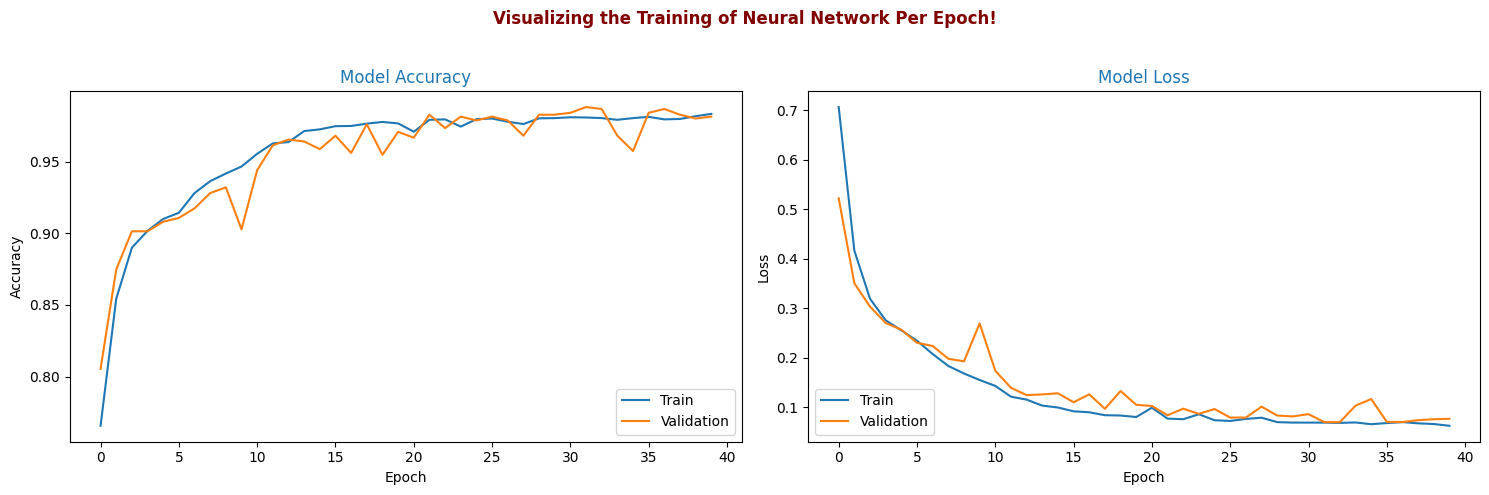

In [ ]:
# Add Figursize and Title to the subplot
plt.figure(figsize=(15,5))
plt.suptitle('Visualizing the Training of Neural Network Per Epoch!\n', weight='bold', color='maroon')

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy', color='tab:blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss', color='tab:blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')

plt.tight_layout()

plt.savefig('ModelTraining.png')
plt.show()

**Observations:-**
- As loss decreases, accuracy increases and vice-versa is also seen to be true.
- We cannot see much of overfitting, little bit is fine.
- Now we can go ahead and test the brain we have crafted for this project.

In [ ]:
# Get the precdiction output on X_test data
y_predict = model.predict(X_test)

79/79 [==============================] - 0s 3ms/step


In [ ]:
# Check the probabilities of the classes
y_predict

array([[9.99476135e-01, 5.21294714e-04, 2.45775300e-06],
       [1.26755936e-03, 9.98732388e-01, 0.00000000e+00],
       [6.80344105e-01, 3.26403242e-04, 3.19329560e-01],
       ...,
       [9.99863267e-01, 1.11776426e-04, 2.49576824e-05],
       [2.73042446e-04, 9.99726951e-01, 0.00000000e+00],
       [9.97438788e-01, 2.55952333e-03, 1.64970231e-06]], dtype=float32)

In [ ]:
# Convert y_test (one hot vectors) and y_predict (softmax probabilitites) into the names of classes (Galaxy, Quasar, Star)
y_test_class = enc.inverse_transform(y_test)
y_predict_class = enc.inverse_transform(y_predict)

In [ ]:
# Cross check if it worked using first two data in both the outputs
print('Acutal Classes:-')
print(y_test_class[:2])

print()

print('Predicted Classes by our Model')
print(y_predict_class[:2])

Acutal Classes:-
[['GALAXY']
 ['QSO']]

Predicted Classes by our Model
[['GALAXY']
 ['QSO']]


In [ ]:
# Import Confusion Matrix from Sklearn
from sklearn.metrics import confusion_matrix

# It takes actual and predicted outputs to create confusion matrix
cm = confusion_matrix(y_test_class, y_predict_class)

In [ ]:
cm

array([[1203,    3,   40],
       [  10,  232,    0],
       [   2,    0, 1010]])

In [ ]:
import seaborn as sns

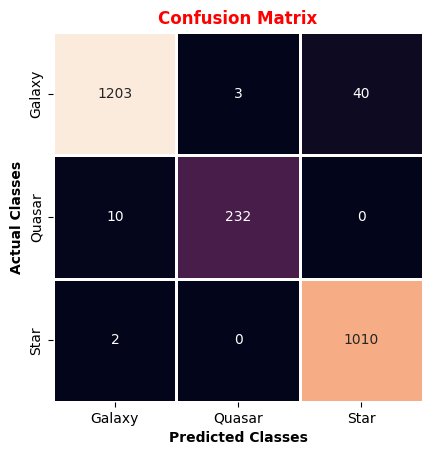

In [ ]:
# Prepare xticklabels and yticklabels
labels = ['Galaxy', 'Quasar', 'Star']

# Using seaborn's heatmap to visualize the matrix with a lot of input arguments
sns.heatmap(cm, annot=True, square=True,
            fmt='d', cbar=False, linewidth=2,
            xticklabels=labels, yticklabels=labels)

# Add Customization
plt.title('Confusion Matrix', weight='bold', color='red')
plt.xlabel('Predicted Classes', weight='bold')
plt.ylabel('Actual Classes', weight='bold')

# Save the figure and display it
plt.savefig('ConfusionMatrix.png')
plt.show()